# Anomalie globale de température (ERA5 1979-2020)

Auteur : Frédéric FERRY (ENM) - décembre 2020

- Données mensuelles de température issues des réanalyses ERA5 :
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

import xarray as xr

from cartopy import config
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes

In [4]:
t    = xr.open_dataset("./data/era5.t2m.mon.1979-2020.nc")
t2   = xr.open_dataset("./data/era5.t2m.mon.1979-2020.nc").sel(time=slice('1981','2010'))
print("----- Computing monthly anomalies -----")
tanom=t.groupby('time.month')-t2.groupby('time.month').mean('time')
print(tanom)

lat=tanom.latitude.values
lon=tanom.longitude.values
time=tanom.time.values

months=['January','February','March','April','May','June','July',
       'August','September','October','November','December']

----- Computing monthly anomalies -----
<xarray.Dataset>
Dimensions:    (time: 504, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m        (time, latitude, longitude) float32 -2.901 -2.901 ... 2.302 2.302


In [5]:
year='2020'
tyear=tanom.sel(time=year)
data=tyear['t2m'][:,:,:]
print(data)

<xarray.DataArray 't2m' (time: 12, latitude: 721, longitude: 1440)>
array([[[-0.5892334 , -0.5892334 , -0.5892334 , ..., -0.5892334 ,
         -0.5892334 , -0.5892334 ],
        [-0.7448883 , -0.7449646 , -0.7451019 , ..., -0.7442322 ,
         -0.7443085 , -0.7446594 ],
        [-0.872879  , -0.8731384 , -0.87353516, ..., -0.8730316 ,
         -0.87171936, -0.87228394],
        ...,
        [ 0.01016235,  0.01057434,  0.01077271, ...,  0.01031494,
          0.01072693,  0.01123047],
        [-0.07820129, -0.08007812, -0.07981873, ..., -0.07870483,
         -0.07841492, -0.078125  ],
        [-0.12849426, -0.12849426, -0.12849426, ..., -0.12849426,
         -0.12849426, -0.12849426]],

       [[-0.7320709 , -0.7320709 , -0.7320709 , ..., -0.7320709 ,
         -0.7320709 , -0.7320709 ],
        [-0.9949188 , -0.9913635 , -0.9913788 , ..., -0.9986572 ,
         -0.99702454, -0.9967804 ],
        [-1.1773834 , -1.1737671 , -1.1702728 , ..., -1.1846313 ,
         -1.1812134 , -1.1790924 ],

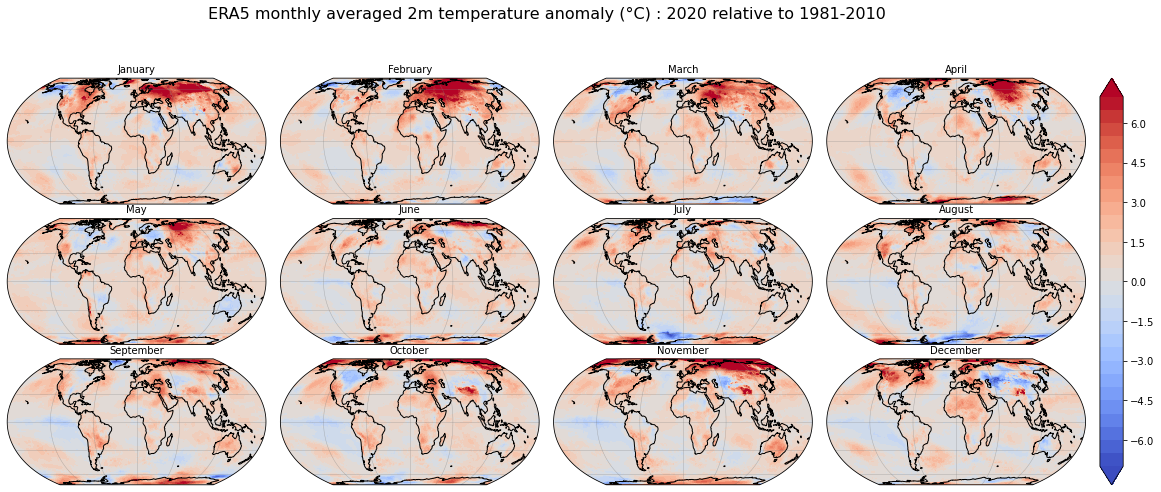

In [6]:
def plot_background(ax):
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    return ax

proj=ccrs.EqualEarth()

levels=np.arange(-7,7.5, 0.5)

axes_class = (GeoAxes, dict(map_projection=proj))
fig = plt.figure(figsize=(20,8))
fig.suptitle('ERA5 monthly averaged 2m temperature anomaly (°C) : '+year+ ' relative to 1981-2010', fontsize=16)

axgr = AxesGrid(fig, 111, axes_class=axes_class,
       nrows_ncols=(3, 4),
       axes_pad=0.2,
       cbar_location='right',
       cbar_mode='single', # None/single/each
       cbar_pad=0.2,
       cbar_size='3%',
       label_mode='')  # note the empty label_mode
                   
for i, ax in enumerate(axgr):
    plot_background(ax)
    ax.set_title(months[i], fontsize=10)
    p1 = ax.contourf(lon, lat, data[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                    cmap='coolwarm', extend='both')
    axgr.cbar_axes[i].colorbar(p1)

plt.show()

figname='./figs/ERA5_Tanom_monthly_'+year
fig.savefig(figname+'.png',bbox_inches='tight')

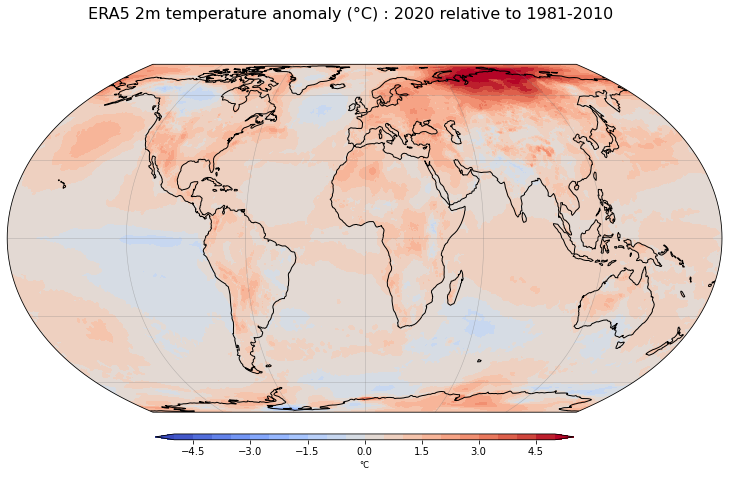

In [7]:
glob=data.mean()

levels=np.arange(-5,5.5, 0.5)

fig = plt.figure(figsize=(15,8))
fig.suptitle('ERA5 2m temperature anomaly (°C) : '+year+ ' relative to 1981-2010', fontsize=16)
ax = fig.add_subplot(1, 1, 1, projection=proj)
plot_background(ax)
#ax.set_title('Global anomaly : '+str(round(float(glob),2))+'°C', fontsize=14)
p1 = ax.contourf(lon, lat, data.mean(axis=0), levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
cb = fig.colorbar(p1, orientation='horizontal', aspect=65, shrink=0.5, pad=0.05)
cb.set_label('°C', size='small')   
plt.show()

figname='./figs/ERA5_Tanom_'+year
fig.savefig(figname+'.png',bbox_inches='tight')